# Pymaceuticals Inc.
---

### Analysis

- First, the drugs Capomulin and Ramicane have the lowest mean and median tumor volume out of all drugs tested, with the lowest standard deviation as well. It would be probable to infer that Capomulin and Ramicane have the best results of the drugs tested in terms of tumor volume.
- Next, while Infubinol and Ceftamin have similar results on the summary table, Infubinol has an outlier as descibed in the boxplot. The data for Infubinol may need to be adjusted to account for this, or the result could require more investigation.
- Finally, there is a strong correlation between the weight of a mouse and the volume of a tumor for the Capomulin regimen. With a correlation of 0.84, generally, as the mouse weight increases, so does the volume of the tumor. 
 

In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [145]:
# Checking the number of mice.
mouse_results['Mouse ID'].nunique()

249

In [146]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_results[mouse_results.duplicated(subset = ["Mouse ID", "Timepoint"], keep=False)]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [147]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = mouse_results.loc[(mouse_results["Mouse ID"]=="g989")]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [148]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_index = mouse_results.loc[(mouse_results["Mouse ID"]=="g989")].index
mouse_results_clean = mouse_results.drop(duplicate_index)
mouse_results_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [149]:
# Checking the number of mice in the clean DataFrame.
mouse_results_clean['Mouse ID'].nunique()

248

## Summary Statistics

In [150]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
drugs_summary = mouse_results_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
drugs_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

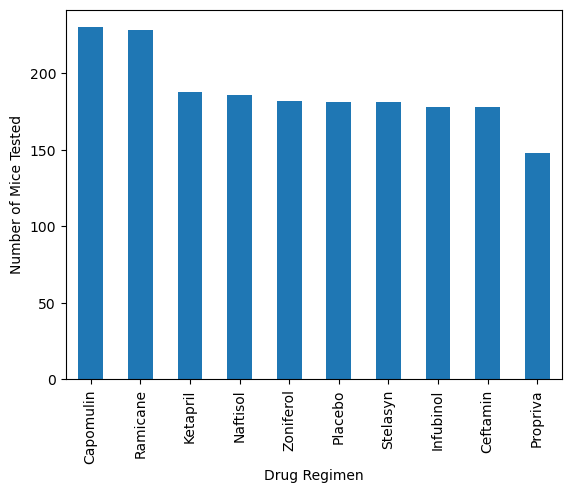

In [151]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_counts = mouse_results_clean["Drug Regimen"].value_counts()
mouse_counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

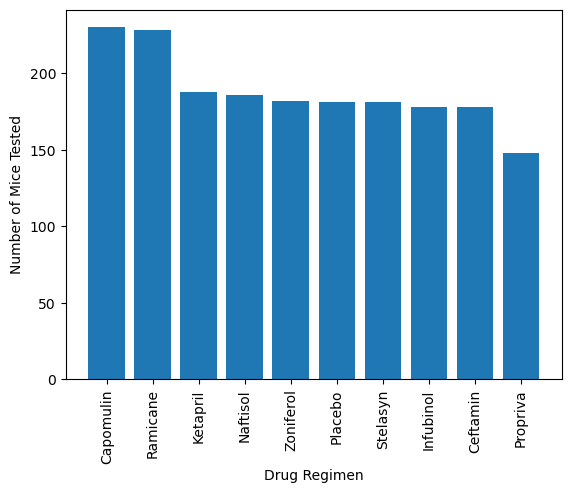

In [152]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(mouse_counts.index.values, mouse_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

<AxesSubplot:ylabel='Sex'>

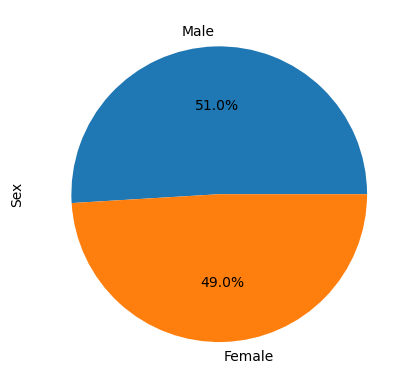

In [153]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = mouse_results_clean["Sex"].value_counts()
mouse_sex.plot(kind="pie", autopct="%1.1f%%")

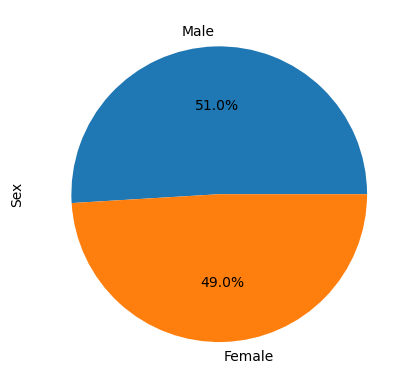

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex.values, autopct="%1.1f%%", labels=mouse_sex.index.values)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [155]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = mouse_results_clean.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_merged = pd.merge(mouse_results_clean, max_timepoint, how="right", on=["Mouse ID", "Timepoint"])
max_timepoint_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [156]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for drug in drug_regimens:
    volume = max_timepoint_merged.loc[max_timepoint_merged["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol.append(volume)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    lowerq = volume.quantile(.25)
    upperq = volume.quantile(.75)
    iqr = upperq-lowerq
    lowerbound = lowerq-(1.5*iqr)
    upperbound = upperq+(1.5*iqr)
    
    outliers = volume.loc[(volume<lowerbound) | (volume>upperbound)]
    print(outliers)
    

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


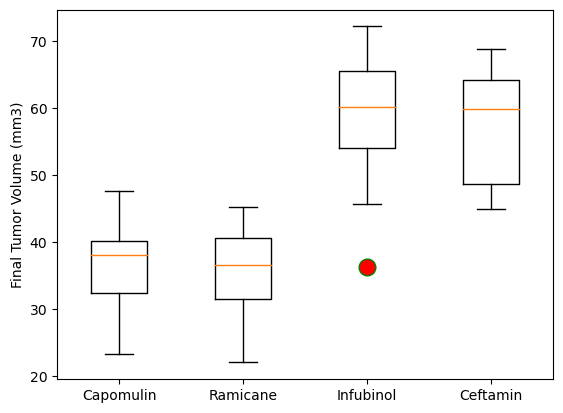

In [157]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
plt.boxplot(tumor_vol, flierprops=flierprops)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks(ticks=[1,2,3,4], labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

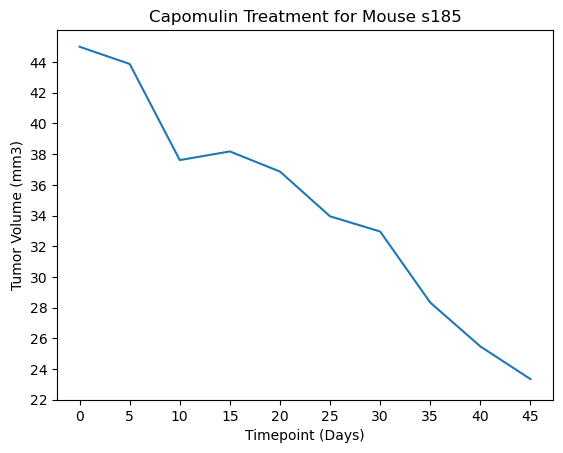

In [158]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = mouse_results_clean.loc[mouse_results_clean["Mouse ID"]=="s185"]
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.xticks(ticks=capomulin_mouse["Timepoint"])
plt.yticks(np.arange(22, 45, step=2))
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for Mouse s185")
plt.show()

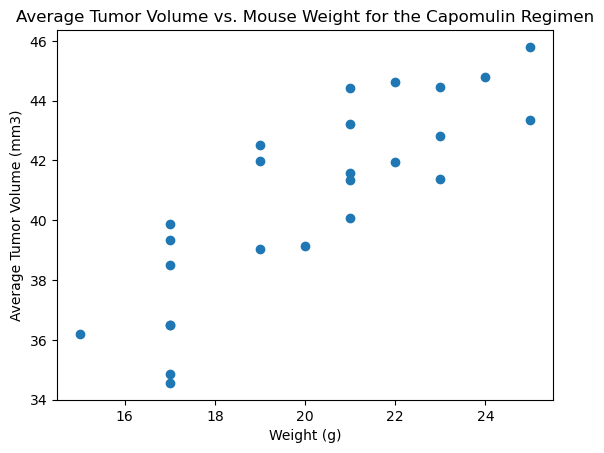

In [159]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
all_capomulin = mouse_results_clean.loc[mouse_results_clean["Drug Regimen"]=="Capomulin"]
avg_tumor = all_capomulin.groupby("Mouse ID").agg({"Tumor Volume (mm3)":["mean"]})
avg_weight = all_capomulin.groupby("Mouse ID").agg({"Weight (g)":["mean"]})
plt.scatter(avg_weight, avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


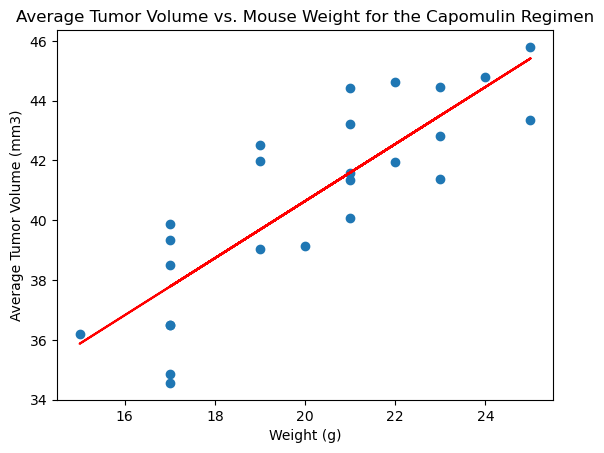

In [160]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = avg_weight.iloc[:, 0]
y_values = avg_tumor.iloc[:, 0]

(slope, intercept, r, p, se) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")

correlation = st.pearsonr(x_values, y_values)

print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()
